# Bootcamp: Arquiteto(a) de Machine Learning

## Trabalho Prático
**Módulo 4: Aplicações de Aprendizado de Máquina Para IoT**

## Objetivos de Ensino
**Exercitar os seguintes conceitos trabalhados no Módulo:**


1. Identificação de anomalias.
2. Tratamento do dataset.
3. Conhecendo o dataset.
4. Utilizar modelos de previsão para séries temporais.

## Enunciado

**Atualmente, a IoT é um dos principais elementos responsáveis pela geração
de dados e troca de informação existente em nosso planeta. Dessa forma,
conhecendo as características dos dispositivos IoT (reduzida disponibilidade
de recursos), é natural que os dados gerados por esses dispositivos
contenham diferentes tipos de anomalias (dados faltosos, errados e outliers).
Portanto, é necessário realizar um processamento cuidadoso desses dados
antes de aplicar qualquer um dos modelos de aprendizado de máquina.
Imagine um cenário em que se deseja realizar a previsão de temperatura em
uma residência a partir de dados históricos coletados por diferentes sensores.
Nesse cenário, realizar o pré-processamento é fundamental.
Essa previsão de temperatura pode ser utilizada, por exemplo, para a
construção de um sistema que seja capaz de prever e ajustar a temperatura
do ambiente. Quando esse ajuste ocorre de maneira eficiente, os atuadores
(ar-condicionado e aquecedores) passam a funcionar de maneira harmônica,
o que proporciona maior conforto aos residentes e uma maior economia de
energia.** 

**Previsão de temperatura**

In [1]:
#importando os módulos a serem utilizados
import pandas as pd                                   #utilizado para a construção os dataframes e análise exploratória
import numpy as np                                    #utilizado para a operações vetoriais e matriciais
import matplotlib.pyplot as plt                       #utilizado para construção de gráficos
from sklearn.linear_model import LinearRegression     #utilizada para a construção do modelo de regressão linear

In [76]:
#importando os dados
IOT_temp = pd.read_csv("IOT-temp.csv")

In [77]:
#conhecendo o dataset
IOT_temp.head(5)

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


*Mostrando os dados*



1.   id -> identificador único para cada medida.
2.   room_id/id -> id do local onde o dispositivo foi instalado
3.   noted_date -> data da leitura
4.   temp -> valor da temperatura medida
5.   out/in -> indica se o dispositivo foi instalado no ambiente interno(in) ou no ambiente externo (out) 



In [78]:
#conhecendo as características dos dados
IOT_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


**Quantos tipos de dados distintos existem?**

In [79]:
IOT_temp.dtypes.array.unique()

<PandasArray>
[dtype('O'), dtype('int64')]
Length: 2, dtype: object

**Quantos valores nulos existem?**

In [80]:
IOT_temp.isnull().sum()

id            0
room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

In [81]:
#obtendo as estatísticas descritivas do dataset
IOT_temp.describe()

,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


**Qual é a mediana das temperaturas medidas?**

In [82]:
IOT_temp.temp.median()

35.0

In [ ]:
#Contando quantos valores de temperaturas são In ou Out
IOT_temp.groupby("out/in").count()['id']

out/in
In     20345
Out    77261
Name: id, dtype: int64

**Qual é o percentual dos dados de temperaturas coletados no ambiente externo (out)?**

In [83]:
round(IOT_temp['out/in'].value_counts(normalize=True)*100)

Out    79.0
In     21.0
Name: out/in, dtype: float64

In [86]:
#separando o dataset entre valores de In e Out
df_in=IOT_temp[IOT_temp["out/in"]=="In"].reset_index()
df_out=IOT_temp[IOT_temp["out/in"]=="Out"].reset_index()
df_out.head(5)

,index,id,room_id/id,noted_date,temp,out/in
0,2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
1,3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
2,10,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out
3,11,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out
4,16,__export__.temp_log_196094_38501388,Room Admin,08-12-2018 09:21,41,Out


<Figure size 720x720 with 0 Axes>

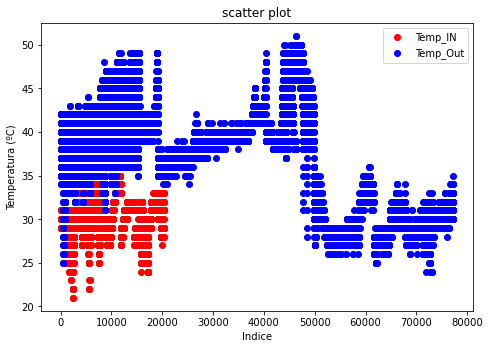

In [87]:
#plotando os valores (sempre bom...)
plt.figure(figsize=(10,10))  #define o tamanho da figura
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_in.index, df_in.temp, color='r')
ax.scatter(df_out.index, df_out.temp, color='b')
ax.set_xlabel('Indice')
ax.set_ylabel('Temperatura (ºC)')
ax.legend(["Temp_IN", "Temp_Out"])
ax.set_title('scatter plot')
plt.show()

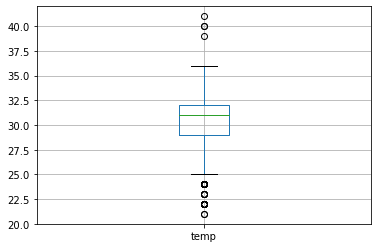

In [88]:
#identificando possíveis outliers por meio do boxplot das temperaturas internas
df_in.boxplot("temp");

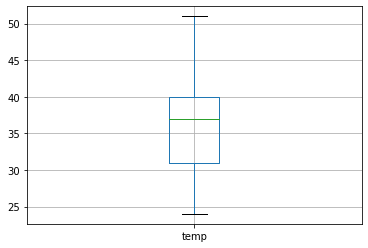

In [89]:
#identificando possíveis outliers por meio do boxplot das temperaturas externas
df_out.boxplot("temp");

**Sobre o boxplot dos dados de temperatura interna(in) e externa(out), o que podemos dizer sobre os possíveis outliers?**

**R. Temos possíveis outliers para as temperaturas internas e não identificamos possíveis outliers para as temperaturas externas.**

In [90]:
#verificando se os dados internos possuem uma distribuição normal por meio do histograma
temperatura=df_in.sample(n=2000,random_state=32)['temp']            #selecionando 2000 amostra dos dados 

In [91]:
temperatura

12691    30
9806     29
14954    28
1986     24
18775    32
         ..
526      29
5413     31
281      29
20054    29
11915    28
Name: temp, Length: 2000, dtype: int64

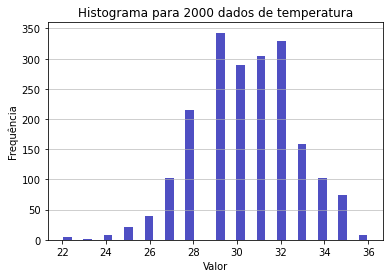

In [92]:
n, bins, patches = plt.hist(x=temperatura, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Histograma para 2000 dados de temperatura');

In [93]:
#utilizando o teste de D’Agostino’s Test para verificar a normalidade dos dados de temperatura
from scipy.stats import normaltest                                      #módulo utilizado para a realização do teste de normalidade 
f_valor, p_valor = normaltest(temperatura)                              #aplica o teste sobre os dados
print('f-valor=%.3f, p-valor=%.3f' % (f_valor, p_valor))
alpha = 0.05                                                         #nível de significância
if p_valor > alpha:
	print('Não rejeita H0')
else:
	print('Rejeita H0')

f-valor=3.881, p-valor=0.144
Não rejeita H0


**Analisando o histograma e o resultado do teste, o que podemos falar sobre a normalidade dos dados?**

**O resultado do teste de normalidade indica que os dados de temperatura coletados no ambiente interno seguem uma distribuição normal, isso fortalece a hipótese de que esses dados podem ser modelados por uma distribuição normal e permite o uso de técnicas estatísticas que exigem a normalidade dos dados, como testes de hipótese e análises de correlação.**

In [94]:
#modificando o tipo dos dados de data para o dataset das temperaturas de entrada
df_in['noted_date']= pd.to_datetime(df_in['noted_date'],errors='coerce') 
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20345 entries, 0 to 20344
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       20345 non-null  int64         
 1   id          20345 non-null  object        
 2   room_id/id  20345 non-null  object        
 3   noted_date  20345 non-null  datetime64[ns]
 4   temp        20345 non-null  int64         
 5   out/in      20345 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 953.8+ KB


**Quantos tipos de dados existem agora no df_in?**

In [95]:
df_in.dtypes.array.unique()

<PandasArray>
[dtype('int64'), dtype('O'), dtype('<M8[ns]')]
Length: 3, dtype: object

**Após a transformação do tipo de dados, foram introduzidos valores nulos?**

In [98]:
df_in.isnull().sum()

index         0
id            0
room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

In [99]:
#ordenando o dataset
df_in=df_in.sort_values(by=['noted_date'])
df_in.head()

,index,id,room_id/id,noted_date,temp,out/in
3545,16218,__export__.temp_log_126924_cb744837,Room Admin,2018-01-11 00:06:00,32,In
3544,16186,__export__.temp_log_128828_1f2ca69c,Room Admin,2018-01-11 02:12:00,32,In
3543,16176,__export__.temp_log_142141_12bd7384,Room Admin,2018-01-11 02:44:00,32,In
3542,16174,__export__.temp_log_106858_cdf61926,Room Admin,2018-01-11 02:46:00,32,In
3541,16167,__export__.temp_log_120068_a0fc57cc,Room Admin,2018-01-11 02:58:00,31,In


In [100]:
#aplicando o reset de index
df_in.reset_index(drop=True)

,index,id,room_id/id,noted_date,temp,out/in
0,16218,__export__.temp_log_126924_cb744837,Room Admin,2018-01-11 00:06:00,32,In
1,16186,__export__.temp_log_128828_1f2ca69c,Room Admin,2018-01-11 02:12:00,32,In
2,16176,__export__.temp_log_142141_12bd7384,Room Admin,2018-01-11 02:44:00,32,In
3,16174,__export__.temp_log_106858_cdf61926,Room Admin,2018-01-11 02:46:00,32,In
4,16167,__export__.temp_log_120068_a0fc57cc,Room Admin,2018-01-11 02:58:00,31,In
...,...,...,...,...,...,...
20340,50723,__export__.temp_log_41083_917dc7ae,Room Admin,2018-12-10 20:25:00,35,In
20341,50721,__export__.temp_log_41090_c0ed0bd1,Room Admin,2018-12-10 20:35:00,34,In
20342,50720,__export__.temp_log_41091_8546ae99,Room Admin,2018-12-10 20:37:00,35,In
20343,50706,__export__.temp_log_41129_77d8da57,Room Admin,2018-12-10 21:31:00,34,In


In [101]:
#aplicando o mesmo procedimento para o dataframe de out
#modificando o tipo de dados 
df_out['noted_date']= pd.to_datetime(df_out['noted_date']) 
df_out=df_out.sort_values(by=['noted_date'])
df_out.reset_index(drop=True)

,index,id,room_id/id,noted_date,temp,out/in
0,16217,__export__.temp_log_146101_e61c18d4,Room Admin,2018-01-11 00:07:00,40,Out
1,16216,__export__.temp_log_111262_7b3ed086,Room Admin,2018-01-11 00:09:00,39,Out
2,16215,__export__.temp_log_147650_344507e9,Room Admin,2018-01-11 00:13:00,40,Out
3,16214,__export__.temp_log_139505_cd77d7f9,Room Admin,2018-01-11 00:23:00,40,Out
4,16213,__export__.temp_log_127981_32c85db7,Room Admin,2018-01-11 00:25:00,40,Out
...,...,...,...,...,...,...
77256,50668,__export__.temp_log_41241_36e995ef,Room Admin,2018-12-10 23:41:00,44,Out
77257,50667,__export__.temp_log_41244_1cef6363,Room Admin,2018-12-10 23:43:00,44,Out
77258,50666,__export__.temp_log_41249_7d6819cd,Room Admin,2018-12-10 23:49:00,44,Out
77259,50665,__export__.temp_log_41250_eed95540,Room Admin,2018-12-10 23:51:00,45,Out


In [102]:
print("Registros existentes no df_IN: ",df_in.count()[0])
print("Registros existentes no df_OUt: ",df_out.count()[0])

Registros existentes no df_IN:  20345
Registros existentes no df_OUt:  77261


In [104]:
#comparando as duas temperaturas "estatísticamente"
frame = { 'temp_in': df_in.temp, 'temp_out': df_out.temp } 
df_in_out=pd.DataFrame(frame)
df_in_out.head()

,temp_in,temp_out
0,29.0,41
1,29.0,41
2,31.0,42
3,31.0,42
4,29.0,41


In [105]:
#mostrando os dados
df_in_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77261 entries, 0 to 77260
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   temp_in   20345 non-null  float64
 1   temp_out  77261 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.8 MB


In [106]:
#exemplificando o pivot
table = pd.pivot_table(IOT_temp, values='temp', index=['noted_date'], columns= ["out/in"],fill_value=0)
table

out/in,In,Out
noted_date,,
01-11-2018 00:06,32.0,0.0
01-11-2018 00:07,0.0,40.0
01-11-2018 00:09,0.0,39.0
01-11-2018 00:13,0.0,40.0
01-11-2018 00:23,0.0,40.0
...,...,...
31-10-2018 23:52,0.0,40.0
31-10-2018 23:53,0.0,39.0
31-10-2018 23:54,32.0,0.0


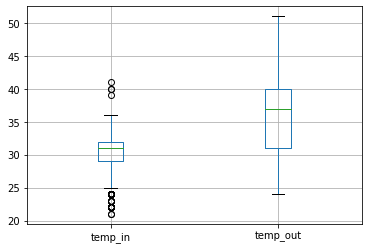

In [107]:
#comparando a igualdade dos valores In e Out
df_in_out.boxplot();

**Analisando o boxplot da temp_in e temp_out, o que é possível afirmar?**

**R. Existe uma maior dispersão nos dados de temperatura externa.**

In [108]:
#criando um modelo de previsão de temperatura 
df_out_new=IOT_temp[IOT_temp["out/in"]=="Out"]["temp"].values

In [109]:
#normaliza os dados
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
serie_out = scaler.fit_transform(df_out_new.reshape(-1, 1))

In [110]:
serie_out

array([[0.62962963],
       [0.62962963],
       [0.66666667],
       ...,
       [0.2962963 ],
       [0.2962963 ],
       [0.2962963 ]])

In [111]:
#define a quantidade de dados para treinamento e teste
train=serie_out[:int(len(serie_out)*0.7)]      #70% inicial para o treinamento
test=serie_out[int(len(serie_out)*0.7):]       #30% final para o teste

In [112]:
#método para colcoar os dados de entrada em um formato necessário para a previsão
#define o intervalo a ser utilizado para entrada da rede neural recorrente LSTM
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [113]:
look_back = 3                                           # quantidade de passos para a autocorrelação
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [114]:
#colocando os dados no formato para entrada na rede LSTM  [amostras, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, 1))
testX = np.reshape(testX, (testX.shape[0], look_back, 1))

In [115]:
#definindo o modelo para a rede neural recorrente LSTM
from tensorflow.keras.models import Sequential              #utilizando o modelo sequencial para a construção da rede
from tensorflow.keras.layers import Dense, Flatten, LSTM    #utilizado para definir as camadas a serem utilizadas


In [116]:
#definindo o modelo
model = Sequential()
model.add(LSTM(4, input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [117]:
#mostra o modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


**Sobre a rede LSTM criada, o que é correto dizer?**

In [118]:
#Treina o modelo
historico=model.fit(trainX, trainY, validation_split=0.2,epochs=10, batch_size=100, verbose=2)

Epoch 1/10
433/433 - 6s - loss: 0.0877 - val_loss: 0.0493 - 6s/epoch - 13ms/step
Epoch 2/10
433/433 - 2s - loss: 0.0058 - val_loss: 0.0355 - 2s/epoch - 4ms/step
Epoch 3/10
433/433 - 2s - loss: 0.0038 - val_loss: 0.0206 - 2s/epoch - 3ms/step
Epoch 4/10
433/433 - 1s - loss: 0.0019 - val_loss: 0.0089 - 1s/epoch - 3ms/step
Epoch 5/10
433/433 - 1s - loss: 7.7930e-04 - val_loss: 0.0036 - 1s/epoch - 3ms/step
Epoch 6/10
433/433 - 1s - loss: 4.7766e-04 - val_loss: 0.0023 - 1s/epoch - 3ms/step
Epoch 7/10
433/433 - 2s - loss: 4.4757e-04 - val_loss: 0.0021 - 2s/epoch - 3ms/step
Epoch 8/10
433/433 - 2s - loss: 4.4677e-04 - val_loss: 0.0020 - 2s/epoch - 3ms/step
Epoch 9/10
433/433 - 2s - loss: 4.4597e-04 - val_loss: 0.0020 - 2s/epoch - 3ms/step
Epoch 10/10
433/433 - 2s - loss: 4.4558e-04 - val_loss: 0.0021 - 2s/epoch - 3ms/step


In [119]:
#mostrando as keys presentes no objeto history do keras
print(historico.history.keys())

dict_keys(['loss', 'val_loss'])


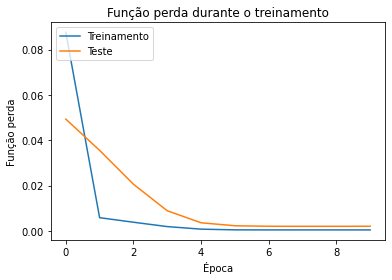

In [120]:
#plotando os gráficos para a função perda do algoritmo
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Função perda durante o treinamento')
plt.ylabel('Função perda')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Teste'], loc='upper left')
plt.show()

**Analisando o gráfico da função perda, o que é incorreto afirmar?**

**R: d. É uma evidência clara de Overfitting.**

In [121]:
# realizando as previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

725/725 [==============================] - 1s 2ms/step


In [122]:
# colocando os dados em um formato para a previsão "correta"
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [123]:
#identificando o "qualidade" do modelo
import math                                       #utilizada para realizar as operações matemáticas
from sklearn.metrics import mean_squared_error    #calcular o erro médio quadrático nas previsões

In [124]:
# Calculando os erros de previsão
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Pontuação para o treinamento: %.2f MSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Pontuação para o teste: %.2f MSE' % (testScore))

Pontuação para o treinamento: 0.75 MSE
Pontuação para o teste: 1.59 MSE


**Analisando o MSE mostrado para o treinamento e teste do algoritmo, o que é incorreto afirmar?**

**R:O erro para o treinamento é superior ao obtido para o teste.**

In [125]:
# realizando o shift dos valores para construir o plot dos valores
trainPredictPlot = np.empty_like(serie_out)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [126]:
# realizando um shift dos dados de previsão para o treinamento
testPredictPlot = np.empty_like(serie_out)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(serie_out)-1, :] = testPredict

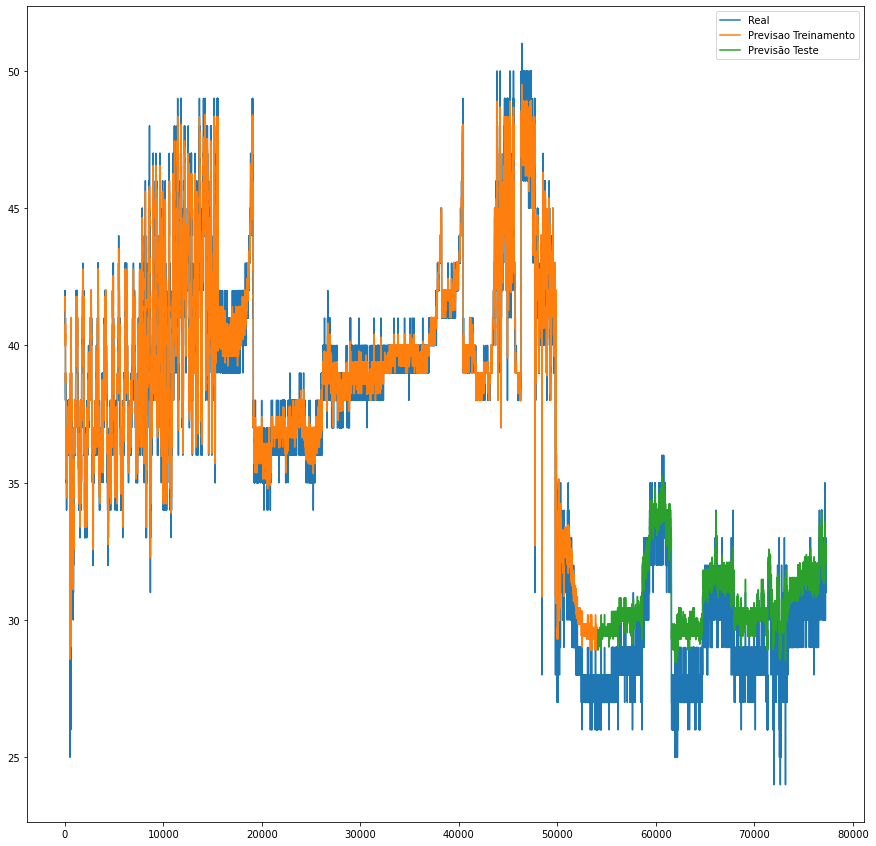

In [127]:
# realizando o plot dos dados para treinamento e teste
plt.figure(figsize=(15,15))  #define o tamanho da figura
plt.plot(scaler.inverse_transform(serie_out))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(["Real","Previsao Treinamento","Previsão Teste"])
plt.show()

**Analisando o gráfico comparativo entre os valores reais e previstos, o que é correto afirmar?**

**R. Boa parte das previsões/testes apresentam valores superiores ao real.**

**Qual dos algoritmos abaixo Não representa uma boa indicação para resolver o probelma de previsão supervisionada de temperatura?**

**R: Autoencoders.**

**Assinale a alternativa que contém uma afirmativa INCORRETA sobre a rede neural utilizada para solução do problema presente neste trabalho prático.**

**R:Para essa rede, é possível realizar a sintonia dos parâmetros a fim de melhorar o desempenho do algoritmo.**